In [18]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#import classes/functions
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

#define constants
trainDataParquet = "data/trainData_2018-2019";
columns_to_use = [
    'Airline',
    'Origin',
    'Dest',
    'CRSDepTime', 
    'Distance', 
    'Year', 
    'Quarter', 
    'Month', 
    'DayofMonth', 
    'DayOfWeek', 
    'DepTimeBlk', 
    'ArrTimeBlk', 
    #'DistanceGroup',
    #'OriginAirportID', 
    #'OriginAirportSeqID', 
    #'OriginCityMarketID', 
    #'OriginCityName', 
    #'OriginState', 
    #'OriginStateFips', 
    #'OriginStateName', 
    #'OriginWac', 
    #'DestAirportID', 
    #'DestAirportSeqID', 
    #'DestCityMarketID', 
    #'DestCityName', 
    #'DestState', 
    #'DestStateFips', 
    #'DestStateName', 
    #'DestWac',
    #'DepTime', 
    #'AirTime', 
    #'CRSElapsedTime', 
    #'ActualElapsedTime', 
    #'DepartureDelayGroups', 
    #'TaxiOut', 
    #'WheelsOff', 
    #'WheelsOn', 
    #'TaxiIn', 
    #'DivAirportLandings',
    #'Marketing_Airline_Network',
    #'Operated_or_Branded_Code_Share_Partners',
    #'DOT_ID_Marketing_Airline',
    #'IATA_Code_Marketing_Airline',
    #'Flight_Number_Marketing_Airline',
    #'Operating_Airline',
    #'DOT_ID_Operating_Airline',
    #'IATA_Code_Operating_Airline',
    #'Tail_Number',
    #'Flight_Number_Operating_Airline'
    ]

In [19]:
#load data
trainingData = pd.read_parquet(trainDataParquet, columns = columns_to_use, engine="fastparquet");
print(trainingData.head());

       Airline  Origin  Dest  CRSDepTime  Distance  Year  Quarter  Month  \
index                                                                      
9           11      22     4        1037     145.0  2018        1      1   
14          11      22     4        1037     145.0  2018        1      1   
15          11      22     4        1037     145.0  2018        1      1   
17          11      22     4        1037     145.0  2018        1      1   
18          11      22     4        1037     145.0  2018        1      1   

       DayofMonth  DayOfWeek  DepTimeBlk  ArrTimeBlk  
index                                                 
9               3          3           5           6  
14              8          1           5           6  
15              9          2           5           6  
17             11          4           5           6  
18             12          5           5           6  


In [20]:
#calculate uselessness and noisiness of data
#print(np.mean(np.array(trainingData),axis=0));
uselessness = np.std(np.array(trainingData),axis=0)/np.mean(np.array(trainingData),axis=0);
noisiness = np.mean(np.array(trainingData),axis=0)/np.std(np.array(trainingData),axis=0);
print("Uslessness of features:");
print(uselessness);
print();
print("Noisiness of features:");
print(noisiness)

Uslessness of features:
[5.30679966e-01 5.42671437e-01 5.39018894e-01 3.46732894e-01
 7.47597601e-01 2.44561151e-04 4.25204524e-01 5.02671449e-01
 5.52905209e-01 5.05496930e-01 5.52515577e-01 4.86094394e-01]

Noisiness of features:
[1.88437489e+00 1.84273564e+00 1.85522254e+00 2.88406441e+00
 1.33761799e+00 4.08895687e+03 2.35180941e+00 1.98937099e+00
 1.80862829e+00 1.97825138e+00 1.80990372e+00 2.05721361e+00]


In [21]:
#test out PCA on the whole dataset
newFeatures = PCA();
newFeatures.fit(trainingData);
print(newFeatures.explained_variance_ratio_);
print(newFeatures.singular_values_);

[5.81483027e-01 3.85348619e-01 1.66881186e-02 1.61906002e-02
 1.25759649e-04 1.15951255e-04 2.15530105e-05 1.91646766e-05
 6.55546169e-06 3.91895518e-07 1.54477166e-07 1.05464506e-07]
[1.41118019e+06 1.14879055e+06 2.39065904e+05 2.35475337e+05
 2.07531780e+04 1.99274477e+04 8.59147879e+03 8.10148624e+03
 4.73822406e+03 1.15850817e+03 7.27354447e+02 6.00989816e+02]


In [5]:
#create reduced space (likely unneccesary unless we want to use the transformed space for our features)
newFeatures = PCA(n_components = 2);
newFeatures.fit(trainingData);

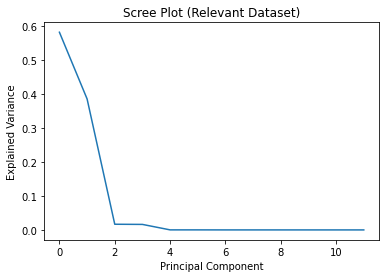

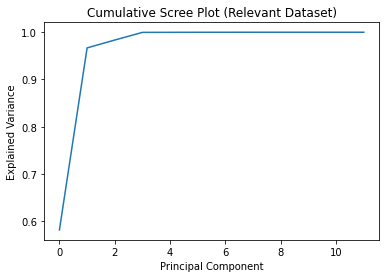

In [25]:
#graph the scree plot
plt.plot(newFeatures.explained_variance_ratio_);
plt.xlabel("Principal Component");
plt.ylabel("Explained Variance");
plt.title("Scree Plot (Relevant Dataset)");

plt.figure();
plt.plot(np.cumsum(newFeatures.explained_variance_ratio_));
plt.xlabel("Principal Component");
plt.ylabel("Explained Variance");
plt.title("Cumulative Scree Plot (Relevant Dataset)");

[[-1.73420557e-04  1.13365924e-02  1.19095244e-02 -6.57789408e-02
   9.97698510e-01 -8.85251505e-06 -1.81911592e-05 -4.98619738e-05
   4.45578914e-05  3.81101406e-05 -6.20132513e-04 -1.94844741e-04]
 [-5.46667335e-04  5.98110175e-03 -4.89859711e-03 -9.97725918e-01
  -6.57979223e-02  8.16430250e-07  1.29003911e-05  3.43979365e-05
   8.86847741e-06 -5.45045925e-05 -9.86423628e-03 -7.49995028e-03]
 [-2.44928644e-03 -6.39683830e-01 -7.68458946e-01 -1.13846974e-03
   1.63661676e-02  9.31879304e-05  1.79714796e-04  4.68726788e-04
  -1.12234703e-04 -3.75445311e-05 -9.20229018e-06 -1.56410666e-04]
 [ 6.81351289e-04  7.68528191e-01 -6.39767679e-01  7.78052211e-03
  -5.82399363e-04 -2.53708769e-05  1.14487766e-05  3.99862405e-05
   1.70757719e-05  3.20563894e-06  1.11300173e-04  6.17687687e-04]
 [ 4.24261115e-02 -1.69289487e-04 -1.32730631e-04  4.15352371e-06
  -3.32900726e-05 -3.88868795e-04  3.60523555e-03  1.15010311e-02
   9.99023711e-01  1.19443827e-03  7.97056104e-06 -2.18015807e-03]
 [-9.

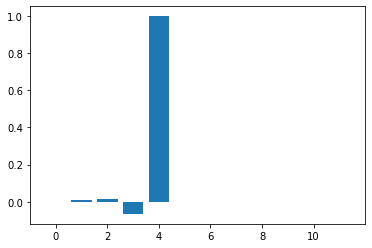

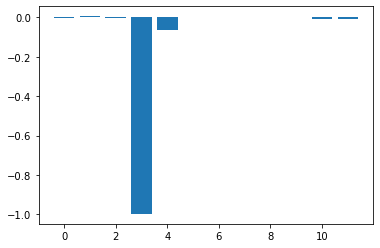

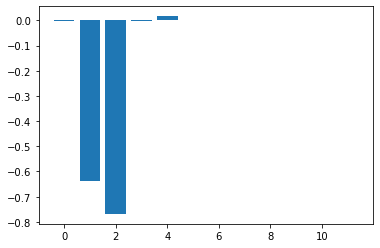

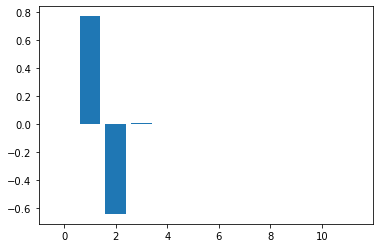

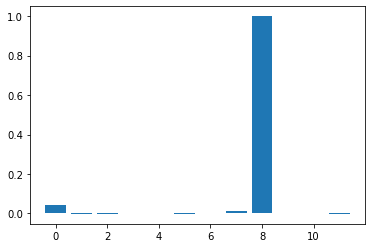

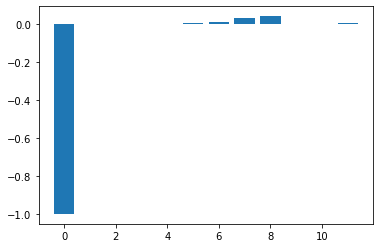

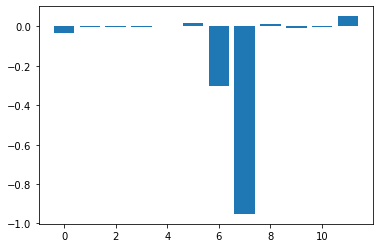

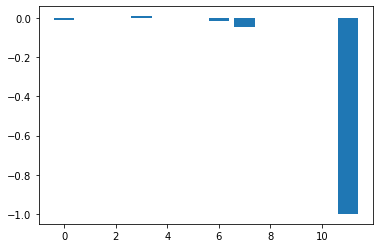

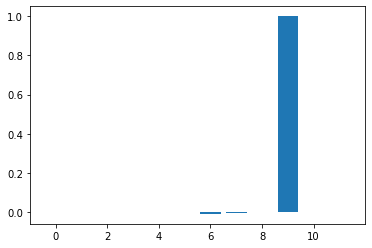

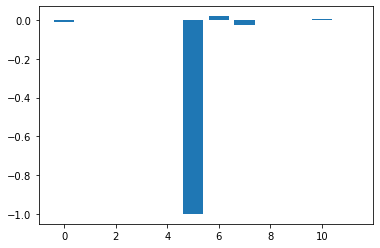

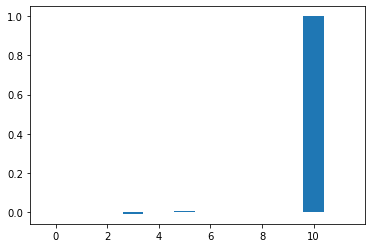

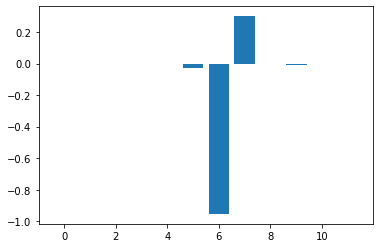

In [23]:
#create graphs of the loading vectors
print(newFeatures.components_);
#newData = pd.DataFrame(newFeatures.components_, columns=["PC1","PC2"]);
#newData.to_parquet("data/trainDataPCA_2018-2019")
for i in range(np.size(columns_to_use)):
    plt.figure();
    plt.bar(np.arange(np.size(newFeatures.components_[i,:])),newFeatures.components_[i,:]);

[-1.73420557e-04  1.13365924e-02  1.19095244e-02 -6.57789408e-02
  9.97698510e-01 -8.85251505e-06 -1.81911592e-05 -4.98619738e-05
  4.45578914e-05  3.81101406e-05 -6.20132513e-04 -1.94844741e-04]
[-5.46667335e-04  5.98110175e-03 -4.89859711e-03 -9.97725918e-01
 -6.57979223e-02  8.16430250e-07  1.29003911e-05  3.43979365e-05
  8.86847741e-06 -5.45045925e-05 -9.86423628e-03 -7.49995028e-03]
0.011909524358211444


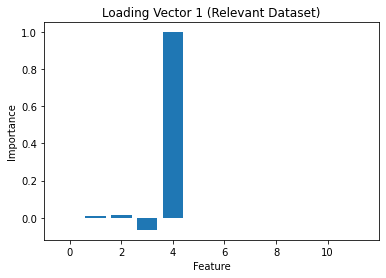

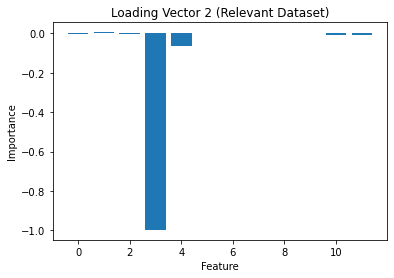

In [26]:
print(newFeatures.components_[0,:]);
print(newFeatures.components_[1,:]);
print(newFeatures.components_[0,2]);
plt.figure();
plt.bar(np.arange(np.size(newFeatures.components_[0,:])),newFeatures.components_[0,:]);
plt.xlabel("Feature");
plt.ylabel("Importance");
plt.title("Loading Vector 1 (Relevant Dataset)");
plt.figure();
plt.bar(np.arange(np.size(newFeatures.components_[1,:])),newFeatures.components_[1,:]);
plt.xlabel("Feature");
plt.ylabel("Importance");
plt.title("Loading Vector 2 (Relevant Dataset)");